In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#https://github.com/mwaskom/seaborn-data
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df.describe(include='object') # top means mode (most repeatative)

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [8]:
df['sex'].nunique() # number od uiniwque

2

In [9]:
df['sex'].unique() # unique

array(['male', 'female'], dtype=object)

In [10]:
df['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [11]:
df['embark_town'].nunique()

3

In [12]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [13]:
df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [46]:
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [14]:
df['age'].median()

28.0

<Axes: xlabel='age', ylabel='Count'>

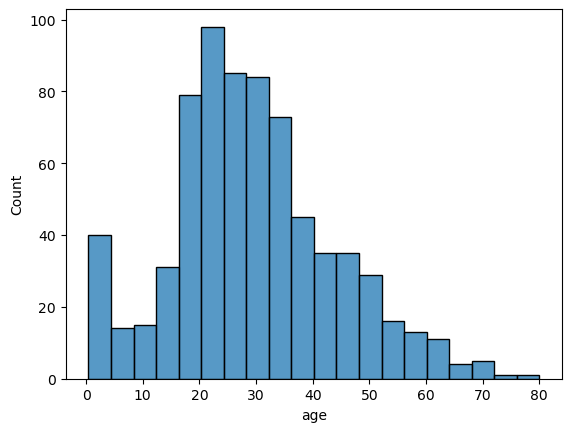

In [15]:
sns.histplot(df['age'])

In [17]:
df['age']=df['age'].fillna(df['age'].median())

In [18]:
df['sex'].mode()[0]

'male'

In [19]:
df['sex']=df['sex'].fillna(df['sex'].mode()[0])

In [20]:
df['deck'].mode()

0    C
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [21]:
df['deck']=df['deck'].fillna(df['deck'].mode()[0])

In [22]:
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

In [23]:
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0])

In [24]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [25]:
# # categorical
# nominal vs ordinal
# ordinal -> with order 
# 03 types of encoding
# one hot encoding -> nominal category mayu use kerty hai
# label encoding ko hum srf output coloumn k liye use kerty hai
# ordinal encoding
df=pd.get_dummies(df,drop_first=True)
df.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,0,3,22.0,1,0,7.2500,True,False,True,False,...,False,False,True,False,False,False,False,False,True,False
1,1,1,38.0,1,0,71.2833,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
2,1,3,26.0,0,0,7.9250,False,True,False,False,...,True,False,True,False,False,False,False,False,True,True
3,1,1,35.0,1,0,53.1000,False,False,False,False,...,True,False,True,False,False,False,False,False,True,True
4,0,3,35.0,0,0,8.0500,True,True,True,False,...,False,False,True,False,False,False,False,False,True,False


In [49]:
x = df.drop(columns=['survived', 'age', 'fare'])
x

,pclass,sibsp,parch,adult_male,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,3,1,0,True,False,True,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False
1,1,1,0,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
2,3,0,0,False,True,False,False,True,False,True,...,True,False,True,False,False,False,False,False,True,True
3,1,1,0,False,False,False,False,True,False,False,...,True,False,True,False,False,False,False,False,True,True
4,3,0,0,True,True,True,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,True,True,True,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
887,1,0,0,False,True,False,False,True,False,False,...,True,True,False,False,False,False,False,False,True,True
888,3,1,2,False,False,False,False,True,False,True,...,True,False,True,False,False,False,False,False,True,False
889,1,0,0,True,True,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [50]:
y=df['survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=90)


In [52]:
x_train

,pclass,sibsp,parch,adult_male,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
415,3,0,0,False,True,False,False,True,False,True,...,True,False,True,False,False,False,False,False,True,False
652,3,0,0,True,True,True,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False
204,3,0,0,True,True,True,False,True,False,True,...,False,False,True,False,False,False,False,False,True,True
32,3,0,0,False,True,False,True,False,False,True,...,True,False,True,False,False,False,False,True,False,True
860,3,2,0,True,False,True,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,2,1,1,False,False,False,False,True,True,False,...,True,False,True,False,False,False,False,False,True,True
671,1,1,0,True,False,True,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
626,2,0,0,True,True,True,True,False,True,False,...,False,False,True,False,False,False,False,True,False,False
669,1,1,0,False,False,False,False,True,False,False,...,True,False,True,False,False,False,False,False,True,True


In [53]:
y_train

415    0
652    0
204    1
32     1
860    0
      ..
323    1
671    0
626    0
669    1
859    0
Name: survived, Length: 668, dtype: int64

In [63]:
x_test.columns

Index(['pclass', 'sibsp', 'parch', 'adult_male', 'alone', 'sex_male',
       'embarked_Q', 'embarked_S', 'class_Second', 'class_Third', 'who_man',
       'who_woman', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G',
       'embark_town_Queenstown', 'embark_town_Southampton', 'alive_yes'],
      dtype='object')

In [55]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model


LogisticRegression()

In [56]:
model.fit(x_train,y_train)

LogisticRegression()

In [57]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0])

In [58]:
pd.DataFrame({'y_test':y_test,'y_predict':y_pred})

,y_test,y_predict
60,0,0
100,0,0
231,0,0
488,0,0
221,0,0
...,...,...
673,1,1
300,1,1
162,0,0
310,1,1


In [59]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Precision Score:",precision_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0


In [61]:
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))
print("Classification Report:",classification_report(y_test,y_pred))

Confusion Matrix: [[145   0]
 [  0  78]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00        78

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223



In [67]:
model.predict([[3,0,1,False,False,True,True,False,True,True,False,True,True,False,True,True,False,True,False,False,False]])

C:\Users\amnas\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])